In [1]:
%matplotlib inline
import MyD2l as d2l
import torch
import torchvision
import sys
import time
from PIL import Image
import numpy as np
from torch import nn
from torch.utils.data import DataLoader

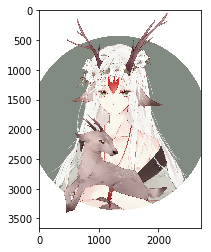

In [2]:
img = Image.open('data/test_pic.jpg')
d2l.plt.imshow(img)

In [3]:
def show_images(imgs, num_rows, num_cols, scale=2):
    figsize = (num_cols * scale, num_rows * scale)
    _, axes = d2l.plt.subplots(num_rows, num_cols, figsize=figsize)
    for i in range(num_rows):
        for j in range(num_cols):
            axes[i][j].imshow(imgs[i * num_cols + j])
            axes[i][j].axes.get_xaxis().set_visible(False)
            axes[i][j].axes.get_yaxis().set_visible(False)
    return axes

In [4]:
def apply(img, aug, num_rows=2, num_cols=4, scale=1.5):
    Y = [aug(img) for _ in range(num_rows * num_cols)]
    show_images(Y, num_rows, num_cols, scale)

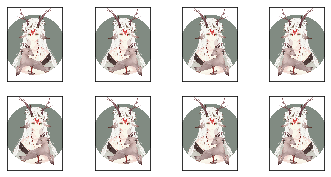

In [5]:
apply(img, torchvision.transforms.RandomHorizontalFlip())

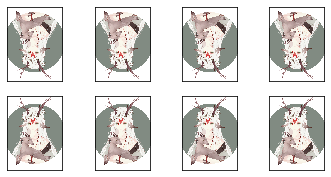

In [6]:
apply(img, torchvision.transforms.RandomVerticalFlip())

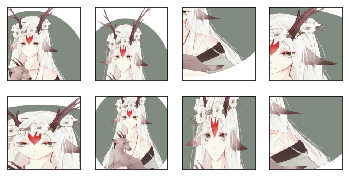

In [7]:
shape_aug = torchvision.transforms.RandomResizedCrop(
    (200, 200),(0.1, 1), (0.5, 2))
apply(img, shape_aug)

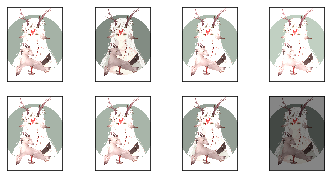

In [8]:
apply(img, torchvision.transforms.ColorJitter(brightness=0.5))

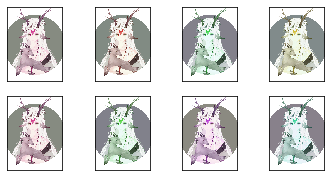

In [9]:
apply(img, torchvision.transforms.ColorJitter(hue=0.5))

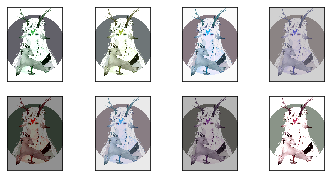

In [10]:
color_aug = torchvision.transforms.ColorJitter(
    brightness=0.5, contrast=0.5, saturation=0.5, hue=0.5)
apply(img, color_aug)

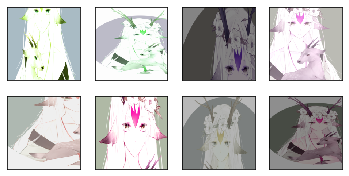

In [11]:
augs = torchvision.transforms.Compose([
    torchvision.transforms.RandomHorizontalFlip(), color_aug, shape_aug])
apply(img, augs)

In [12]:
data_CIFAR10 = torchvision.datasets.CIFAR10('deep learning/data/cifar-10-batches-py', 
                                            train=True, download=False, transform=torchvision.transforms.ToTensor())
# show_images(data_CIFAR10[0:32][0], 4, 8, 0.8)
data_loader = torch.utils.data.DataLoader(data_CIFAR10,
                                          batch_size=32,
                                          shuffle=False,
                                          num_workers=4)

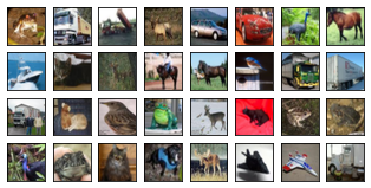

In [13]:
for data, label in data_loader:
    show_images(np.transpose(data.numpy(), (0, 2, 3, 1)), 4, 8, 0.8)
    break

In [14]:
flip_aug = torchvision.transforms.Compose([
    torchvision.transforms.RandomHorizontalFlip(),
    torchvision.transforms.ToTensor()])

no_aug = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor()])

def load_cifar10(is_train, augs, batch_size):
    cifar = torchvision.datasets.CIFAR10('deep learning/data/cifar-10-batches-py', 
                                            train=is_train, download=False, transform=augs)
    return DataLoader(cifar, batch_size, shuffle=is_train, num_workers=4)

In [15]:
def train_with_data_aug(train_augs, test_augs, lr=0.001):
    torch.cuda.empty_cache()
    batch_size, device, net = 256, torch.device('cuda'), d2l.resnet18(3, 10)
    net = net.to(device)
    d2l.initial(net)
    trainer = torch.optim.Adam(net.parameters(), lr)
    train_iter = load_cifar10(True, train_augs, batch_size)
    test_iter = load_cifar10(False, test_augs, batch_size)
    d2l.train_ch5(net, train_iter, test_iter, trainer, 10, device)

In [22]:
train_with_data_aug(flip_aug, no_aug, 0.001)

初始化完成， 开始训练！
epoch 1, loss 0.0055, train acc 0.496, test acc 0.582, time 52.0 sec
epoch 2, loss 0.0041, train acc 0.629, test acc 0.660, time 51.9 sec
epoch 3, loss 0.0034, train acc 0.692, test acc 0.694, time 52.0 sec
epoch 4, loss 0.0030, train acc 0.730, test acc 0.717, time 52.0 sec
epoch 5, loss 0.0027, train acc 0.757, test acc 0.735, time 52.0 sec
epoch 6, loss 0.0025, train acc 0.779, test acc 0.749, time 52.0 sec
epoch 7, loss 0.0022, train acc 0.804, test acc 0.748, time 52.1 sec
epoch 8, loss 0.0020, train acc 0.820, test acc 0.758, time 52.2 sec
epoch 9, loss 0.0018, train acc 0.836, test acc 0.758, time 52.1 sec
epoch 10, loss 0.0017, train acc 0.851, test acc 0.767, time 52.1 sec


In [23]:
train_with_data_aug(no_aug, no_aug, 0.001)

初始化完成， 开始训练！
epoch 1, loss 0.0056, train acc 0.486, test acc 0.593, time 51.8 sec
epoch 2, loss 0.0040, train acc 0.636, test acc 0.649, time 52.0 sec
epoch 3, loss 0.0033, train acc 0.706, test acc 0.691, time 52.1 sec
epoch 4, loss 0.0028, train acc 0.751, test acc 0.714, time 52.1 sec
epoch 5, loss 0.0024, train acc 0.787, test acc 0.719, time 52.0 sec
epoch 6, loss 0.0020, train acc 0.817, test acc 0.724, time 52.3 sec
epoch 7, loss 0.0017, train acc 0.848, test acc 0.732, time 52.1 sec
epoch 8, loss 0.0014, train acc 0.871, test acc 0.747, time 52.2 sec
epoch 9, loss 0.0011, train acc 0.897, test acc 0.743, time 52.1 sec
epoch 10, loss 0.0009, train acc 0.915, test acc 0.740, time 52.0 sec


In [18]:
all_aug = torchvision.transforms.Compose([
    torchvision.transforms.RandomResizedCrop(
    (200, 200),(0.1, 1), (0.5, 2)),
    torchvision.transforms.ToTensor()])

train_with_data_aug(all_aug, no_aug, 0.001)


RuntimeError: CUDA out of memory. Tried to allocate 20.00 MiB (GPU 0; 4.00 GiB total capacity; 2.93 GiB already allocated; 8.80 MiB free; 9.55 MiB cached)